## Projectile Motion and the Euler Method
In this project we will examine the trajectories of projectiles up to 3 dimensions with various forces acting upon them.
The trajectories can be calulated numerically using the $\textit{Forward Euler Method}$, or simply, the $\textit{Euler Method}$.

The Euler Method is a numerical method for solving first order ODEs (Ordinary Differential Equations) given an intial condition.

Consider the differential equations of motion for a projectile in free fall under the acceleration due to gravity in 1 dimension:
$$\frac{dy(t)}{dt} = v(t) \phantom{ooo} \frac{dv(t)}{dt} = a(t) = -g \approx -9.81 \phantom{o}m s^{-2}$$
with $a(t) = a(t; y(t), v(t))$. Let $y_n$ $v_n$ and $a_n$ be the values of position, velocity and acceleration at each time step t_n which are separated by a time step $\Delta t$ such that $t_n = t_0 + n \Delta t$ for some initial time $t_0$ and $n \in \mathbb{Z}$.

Next consider the $\textit{Taylor Series}$ expansions of $x_{n+1} = x(t_n + \Delta t)$ and $v_{n+1} = v(t_n + \Delta t)$

$$v_{n+1} = v_n + a_n \Delta t + O ((\Delta t)^2)$$
$$x_{n+1} = x_n + v_n \Delta t + + \frac{1}{2}a_n (\Delta t)^2 + O ((\Delta t)^3)$$

In the Euler Method, we take these equations only to the first order in $\Delta t$,

$$v_{n+1} = v_n + a_n \Delta t$$
$$x_{n+1} = x_n + v_n \Delta t$$

Because of this truncation, the Euler Method has a $\textit{Local Error}$ of order $(\Delta t )^2$ which is the error between each time step, and has a $\textit{Global Error}$ of order $\Delta t$ which accumulates over the whole time interval.

As the global error is of first order in the time step, we say the Euler Method is a First Order method. The Euler method is limited and in many situations has unstable solutions, but with careful selection of a time step it will be sufficient for calcluating trajectories for projectile motion.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Model parameters
M = 1.0          # Projectile mass (Set to 1 for simplifying Newton's Second Equation)
g = 9.8          # Acceleration due to gravity 
V_0 = 80           # Launch velocity 
theta = (50.0)* np.pi/180     # 2D Launch angle in radians (enter degrees in brackets)
Cd = 0.005       # Drag coefficient
tstep = 0.1    # time step


## 1D Ball Dropping in Free Fall
Consisder the above example where a ball is dropping from an initial height of say, $y(t = 0) = 1000m$ with differential equations $$\frac{dy(t)}{dt} = v(t) \phantom{ooo} \frac{dv(t)}{dt} = a(t) = -g \approx -9.81 \phantom{o}m s^{-2}$$ Using the Euler method, solve iteratively for the velocity profile and trajectory of the ball as it falls towards the ground, you may do this by using a while loop which updates the time, velocity and position at each time step and a nested conditional to stop the loop once the ball reaches the ground. Your code should also determine the time of flight.

Projectile Lands after 14.399999999999965s after 144 iterations


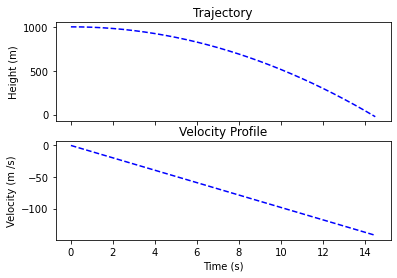

In [35]:
t = [0]
v = [0]
y = [1000]#Dropping ball with no initial velocity
a = -9.81 #Acceleration without drag


iterations = 0
while (iterations < 1000):
    t.append(t[iterations]+tstep)                
    v.append(v[iterations]+tstep*a)  
    y.append(y[iterations]+tstep*v[iterations])
    if y[iterations] < 0:
        print('Projectile Lands after ' + str(t[iterations]) + 's'+ ' ' + 'after' +' ' + str( iterations ) +' '+ 'iterations')
        break
    iterations = iterations +1



fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'b--')
axs[0].set_title('Trajectory')
axs[0].set(xlabel='Time (s)', ylabel='Height (m)')
axs[1].plot(t, v, 'b--')
axs[1].set_title('Velocity Profile')
axs[1].set(xlabel='Time (s)', ylabel='Velocity (m /s)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Lets Add in a Drag Force

Of course, in the real world, a ball will not freely accelerate under gravity, it will have an opposing $\textit{Drag Force}$ acting on it of form

$$F_{d} = C_d \frac{\rho A}{2} v^2$$ in 1D, where $C_d$ is the coefficient of drag, $\rho$ is the density of air, $A$ is the reference area of the ball and $v$ is its velocity.

Repeat the previous exercise now with a drag force acting on the ball (Bonus expriemntal exercise: use this model yourself to estimate the drag coefficient of a ping pong ball!)

You may notice the ball reaches a point where the drag becomes an equal (but opposite) force to the gravitational force, causing acceleration to stop, print the constant $\textit{terminal velocity}$ at which this occurs, to two decimal places.

Projectile Lands after 37.600000000000264s after 376 iterations
The Terminal Velocity is 28.01 m / s.


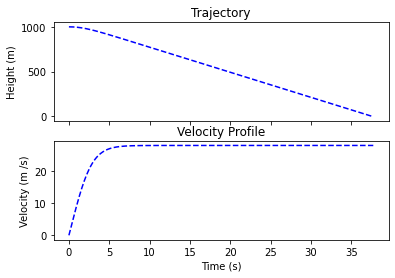

In [36]:
Cd = 0.025
rho = 1
A = 1


t = [0]
v = [0]
y = [1000]#Dropping ball with no initial velocity
Fd = 0 #Initialise drag force
a = [-9.81]  #Acceleration without drag


iterations = 0
while (iterations < 1000):
    t.append(t[iterations]+tstep)             
    a.append(-9.81 + Fd)
    v.append(v[iterations]+tstep*a[iterations])  
    y.append(y[iterations]+tstep*v[iterations])
    Fd = (Cd/2)*rho*A*(v[iterations]**2)
    if y[iterations] < 0:
        print('Projectile Lands after ' + str(t[iterations]) + 's'+ ' ' + 'after' +' ' + str( iterations ) +' '+ 'iterations')
        break
    iterations = iterations +1



fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'b--')
axs[0].set_title('Trajectory')
axs[0].set(xlabel='Time (s)', ylabel='Height (m)')
axs[1].plot(t, np.abs(v), 'b--')
axs[1].set_title('Velocity Profile')
axs[1].set(xlabel='Time (s)', ylabel='Velocity (m /s)')



# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
vterminal = max(np.abs(v))
ans = "The Terminal Velocity is {a:.2f} m / s."
print(ans.format(a = vterminal))


## Projectiles in 2 Dimensions

Now let's move the problem up a dimension, where we have accleration in two directions due to the x and y components of the drag force.

Obtain the velocity 

$$a_y = - g + F_d\sin{\theta}, \phantom{ooo} a_x = F_d \cos{\theta}$$

Imagine a basketballer is taking a shot from $\approx 2.5 m $ above ground, write a code which asks the user to input a throwing speed and angle, and define a function which runs takes these inputs to plot the trajectories of the ball with and without drag. This programme should also print the time of flight and total distance travelled in each case. How much further can the ball travel without drag?

Please enter launch velocity (m/s): 45
Please enter launch angle (degrees): 45
Time of flight without drag: 6.57s
Range without drag: 209.4m
Time of flight with drag: 5.86s
Range with drag: 159.86m
The Ball travels an additonal 49.54m without drag.


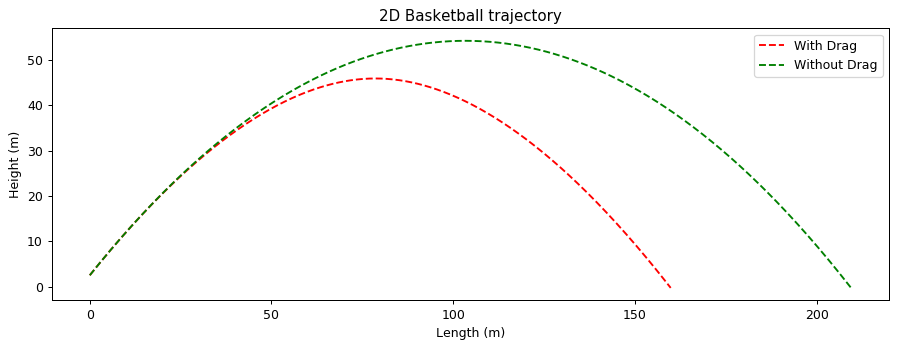

In [9]:
def throw(V_0, theta, drag=True):
    g = 9.81
    m = 1
    Cd = 0.01
    r = 0.5
    A = np.pi*r**2
    rho = 1
    time = np.linspace(0, 100, 10000)
    tof = 0.0
    dt = time[1] - time[0]
    gravity = -g * m
    V_0x = V_0 * np.cos(theta)
    V_0y = V_0 * np.sin(theta)
    v_x = V_0x
    v_y = V_0y
    x = 0.0
    y = 2.5
    xval = list()
    yval = list()
    xval.append(x)
    yval.append(y)
    for t in time:
        F_x = 0.0
        F_y = 0.0
        if (drag == True):
            F_y = F_y - 0.5*Cd*A*rho*v_y**2
            F_x = F_x - 0.5*Cd*A*rho*(v_x**2) * np.sign(v_y)
        F_y = F_y + gravity

        x = x + v_x * dt
        y = y + v_y * dt 
        v_x = v_x + (F_x / m) * dt
        v_y = v_y + (F_y / m) * dt
        if (y >= 0.0):
            xval.append(x)
            yval.append(y)
        else:
            tof = t
            xval.append(x)
            yval.append(y)
            break

    return xval, yval, tof

v = float(input('Please enter launch velocity (m/s): '))
theta = (np.pi/180)*float(input('Please enter launch angle (degrees): '))

fig = plt.figure(figsize=(12,4), dpi=90)
xd, yd, tofd = throw(v, theta, True)
plt.plot(xd, yd, 'r--', label="With Drag")
xwd, ywd, tof = throw(v, theta, False)
plt.plot(xwd, ywd, 'g--', label="Without Drag")
plt.title("2D Basketball trajectory", fontsize=12)
plt.xlabel("Length (m)")
plt.ylabel("Height (m)")
plt.legend(loc = 'best')
print('Time of flight without drag:' + ' '+str(np.round(tof,2)) + 's')
print('Range without drag:' + ' '+ str(np.round(max(xwd),2)) + 'm')
print('Time of flight with drag:' + ' '+str(np.round(tofd,2)) + 's')
print('Range with drag:' + ' '+ str(np.round(max(xd),2)) + 'm')
print('The Ball travels an additonal' + ' ' + str(np.round(max(xwd) - max(xd),2)) +'m'+ ' '+'without drag.')

#### Putting a Spin on Things

In a viral YouTube video (www.youtube.com/watch?v=2OSrvzNW9FE) posted by Veritasium in 2015, a Basketball is dropped from the top of a Dam, with and without a spin put on it.

When the ball has a spin, the $\textit{Magnus Effect}$ is observed, one side of it moves faster relative to the air than the other causing it to push air off to the side which, by Newtons Laws, causes the ball to be pushed back in the opposite direction. This causes the ball to move a lot further out in the 'x' direction that if it were just dropped, as seen below.
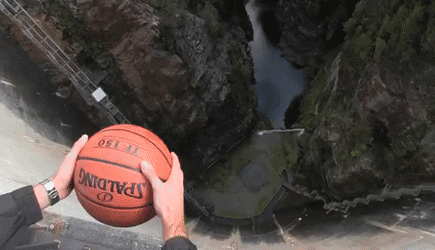



The Magnus force is of the form 
$$F_M = s (\vec{\omega} \times \vec{v})$$

Here $\vec{\omega}$ is the angular velocity vector generated by putting a spin on the ball, it's direction is along the axis of rotation, $\vec{v}$ is the velocity of the ball and s is a parameter depending on the geometry of the ball's surface (we wont worry about the details of s and will set it to 0.01).

The Magnus force can be implemented in much the same style as the Drag force has been in the previous sections.

## First, lets try implementing a spin in 2D:

In the case of 2D the Magnus force is 

$$F_{M} = s\omega \left(- v_y \hat{x} + v_x \hat{y}  \right)$$

Examine the effects of putting a spin on the ball by comparing it to a throw without spin.



Please enter launch velocity (m/s): 45
Please enter launch angle (degrees): 45
Time of flight without Spin: 5.86s
Range without spin: 159.86m
Time of flight with spin: 6.61s
Range with spin: 168.5m
The Ball travels -8.64m less without spin.


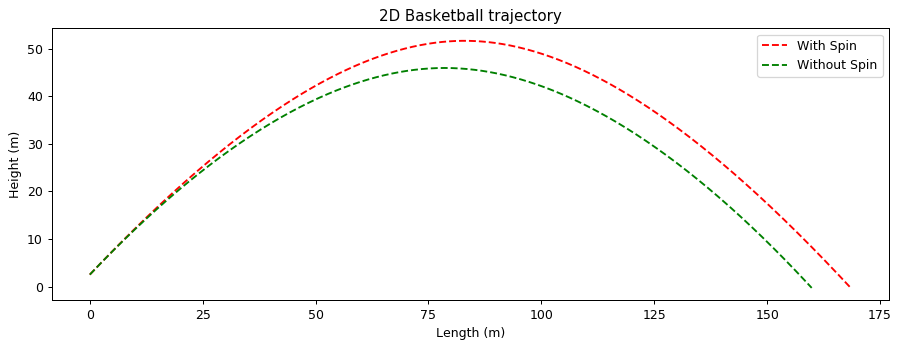

In [34]:
def throw_1(V_0, theta, spin = True):
    g = 9.81
    m = 1
    Cd = 0.01
    r = 0.5
    A = np.pi*r**2
    s = 0.01
    omega = 5
    rho = 1
    time = np.linspace(0, 100, 10000)
    tof = 0.0
    dt = time[1] - time[0]
    gravity = -g * m
    V_0x = V_0 * np.cos(theta)
    V_0y = V_0 * np.sin(theta)
    v_x = V_0x
    v_y = V_0y
    x = 0.0
    y = 2.5
    xval = list()
    yval = list()
    xval.append(x)
    yval.append(y)
    for t in time:
        F_x = 0.0
        F_y = 0.0
        if (spin == True):
            F_y = F_y - 0.5*Cd*A*rho*v_y**2 + (v_x*omega*s)
            F_x = F_x - 0.5*Cd*A*rho*(v_x**2) * np.sign(v_y) - (v_y*omega*s)
        if (spin == False):
            F_y = F_y - 0.5*Cd*A*rho*v_y**2 
            F_x = F_x - 0.5*Cd*A*rho*(v_x**2) * np.sign(v_y) 
        F_y = F_y + gravity

        x = x + v_x * dt
        y = y + v_y * dt 
        v_x = v_x + (F_x / m) * dt
        v_y = v_y + (F_y / m) * dt
        if (y >= 0.0):
            xval.append(x)
            yval.append(y)
        else:
            tof = t
            xval.append(x)
            yval.append(y)
            break

    return xval, yval, tof

v = float(input('Please enter launch velocity (m/s): '))
theta = (np.pi/180)*float(input('Please enter launch angle (degrees): '))

fig = plt.figure(figsize=(12,4), dpi=90)
xd, yd, tofd = throw_1(v, theta, True)
plt.plot(xd, yd, 'r--', label="With Spin")
xwd, ywd, tof = throw_1(v, theta, False)
plt.plot(xwd, ywd, 'g--', label="Without Spin")
plt.title("2D Basketball trajectory", fontsize=12)
plt.xlabel("Length (m)")
plt.ylabel("Height (m)")
plt.legend(loc = 'best')
print('Time of flight without Spin:' + ' '+str(np.round(tof,2)) + 's')
print('Range without spin:' + ' '+ str(np.round(max(xwd),2)) + 'm')
print('Time of flight with spin:' + ' '+str(np.round(tofd,2)) + 's')
print('Range with spin:' + ' '+ str(np.round(max(xd),2)) + 'm')
print('The Ball travels' + ' ' + str(np.round(max(xwd) - max(xd),2)) +'m'+' '+'less without spin.')

## Bonus Exercise 3D Trajectory Animation
Create a model recreating the scenario shown in the veritasium video and using VPython (documentation and examples available at https://vpython.org/), animate the trajectories. This may be done similarly to previous sections by updating the position velocity and Forces acting on the ball at each time step through a loop.

Try animating a trajectory with only gravity, then a trajectory with drag added and finally a trajectory with the Magnus force.

In [38]:
from visual import *

g=vector(0,-9.8,0) # Gravitational acceleration

bridge = box(pos = vector(0,100,0), size = vector(10,1,10), color = color.white) # Putting in the 'Bridge'
water=box(pos=vector(0,0,0), size=vector(100,10,100), color=color.blue) # Putting in the water



ball=sphere(pos=vector(0,102,5.1), radius=.105, color=color.green, make_trail=True) # Creating the basketball

rhoball=70 # NBA standard basketball roughly 70 times more dense than air

ball.m=(rhoball*4*pi*ball.radius**3)/3 # Basketball mass


ball.omega=vector(-20,0,0) # Giving the ball a spin along the x axis
# Adding two more balls to compare trajectories
# This ball will have just gravity
ball2=sphere(pos=ball.pos, radius=ball.radius, color=color.red, make_trail=True) 
# This ball will have gravity and drag but no magnus force
ball3 = sphere(pos=ball.pos, radius=ball.radius, color=color.yellow, make_trail=True)





ModuleNotFoundError: No module named 'visual'

In [ ]:
# Launch Velocity and Angle
v0= 1

theta = 30 * pi/180


ball.v=v0*vector(1,sin(theta),-cos(theta))
ball2.v = ball.v
ball3.v = ball.v
ball.p=ball.m*ball.v

ball2.p=ball.p
ball2.m=ball.m

ball3.p = ball.p
ball3.m = ball.m

rho=1.2
C=.47 
A = pi*ball.radius**2
s=.001

t=0
dt=0.001

In [ ]:
while ball2.pos.y>=5.1:  
    
    F2=ball2.m*g
   

    ball2.p=ball2.p+F2*dt
 
    ball2.pos=ball2.pos+ball2.p*dt/ball2.m
   
    t=t+dt

    rate(1000)
    ball2.v=ball2.p/ball2.m
while ball3.pos.y>=5.1:  
    F=ball3.m*g-.5*rho*A*C*norm(ball3.v)*mag(ball3.v)**2
   
   
    ball3.p=ball3.p+F*dt
  
   
    ball3.pos=ball3.pos+ball3.p*dt/ball3.m
    
   
    t=t+dt

    rate(1000)
   
    ball3.v=ball3.p/ball3.m
  

while ball.pos.y>=5.1:  
    F=ball.m*g-.5*rho*A*C*norm(ball.v)*mag(ball.v)**2+s*cross(ball.omega,ball.v)
   
   
    ball.p=ball.p+F*dt
  
   
    ball.pos=ball.pos+ball.p*dt/ball.m
    
   
    t=t+dt

    rate(1000)
   
    ball.v=ball.p/ball.m
    